# Rによるランダム化実験解析
## ～擬似相関を排除し、因果関係を定量する解析法～

本ノートブックは、データの相関関係が、因果関係によるものなのか否かを検討するための有効な手法であるランダム化実験について、具体例を通した解説を行います。

## 扱う事例(架空のものです)
### 小テストの成績と、テストと無関係な作業手伝いの間に見られる相関関係
※Aさんはデータサイエンティストを目指している学生です。  
①Aさんは文化祭での発表に用いるための、データへのラベル付け作業が予定の期日までに間に合いそうも無いため、
クラスの皆に手伝いを頼みました。すると、小テストの直前という時期にも関わらず、クラスの半数が作業を手伝ってくれました。

②Aさんは、作業を手伝ってくれたクラスメイトが、その所為で試験の成績を下げてしまったのではないかと心配し、貼り出された成績一覧表を見て、作業を手伝ってくれたクラスメイトと、そうではないクラスメイトの成績を比較しました。すると、作業を手伝ってくれたクラスメイトのほうが成績が良いことが分かりました。

③相関関係と因果関係の違いを学びきれていないAさんは、「データのラベル付け作業という行為の中に、試験の成績を上げる秘密があるのではないか？」と自分の発見に喜び興奮しました。小テスト作成者であるB先生は、今回の出来事を、Aさんやクラスの皆に因果関係と相関関係の違いを学ばせるいい機会だと考え、Aさんにランダム化実験という検証実験を行うことを提案しました。  

④B先生は、次の小テストの実施日程を発表し、また、次の授業のためだからと、前回と同様の小テスト前のタイミングで、Aさんのデータラベル付け作業(第2弾)を手伝うか否かを決めるくじ引きを行いました。皆、くじ引きの結果に従いました。B先生は、前回、Aさんが任意で頼んだ作業手伝いを、今回、くじ引きでランダムに強制することにしたのです。

⑤その後、小テストは無事終わり、結果がまた貼り出されました。さっそくAさんは、実施された小テストの結果を前回と同様、作業を手伝ってくれたクラスメイトとそうではないクラスメイトに分けて成績を比較しました。すると、若干ではありますが、作業を手伝ってくれたクラスメイトの方が成績が悪い傾向がありました。

⑥Aさんは、自分の仮説が間違っていたことを残念に思い、なぜこうも結果が異なるのか、考えました。  
そして、  
１．小テスト対策が済んでいる、余裕のあるクラスメイトが作業を手伝ってくれた。  
２．作業を手伝ってもらうと、小テスト対策に割ける時間が減ってしまう。  
３．それでも、作業を手伝ってくれたクラスメイトたちの方が成績が良かった。  
という解釈に至り、B先生にその解釈を報告しました。  
B先生は、Aさんの解釈に同意し、手伝いを募ったときに応じてくれたか否かに生まれた傾向を「選択性バイアス」と呼ぶこと、このバイアスを取り除きたかったら、2度目の小テストのときに行った、「ランダム化実験」を行う「など」の工夫をする必要があることを解説しました。Aさんは、相関関係と因果関係の違いを痛感し、その違いを見抜くためにどのような考察が成されてきたのか、データサイエンスの学習をさらに続けて行きたいと思い至りました。

### 以下、この事例の「選択性バイアスによって、因果関係とは逆の相関関係が見えてしまう」事態が本当にありえるのか、R言語を用いて確認を行います。


## データの作成
#### Pre : 小テストの準備が出来ているか否か
小テストの準備が出来ているか否かを示す指標として、変数Preを用意しました。
変数Preは、平均60、分散20の正規分布に従う乱数で作成しました。
#### Tvol: 1度目の小テスト前の作業手伝いをしたか否か(任意参加)
Aさんが1度目の小テスト前に、任意でお願いした作業の手伝いに応じたか否かを示す変数Tvolで示しました。Tvol=1なら、手伝った、Tvol=0なら手伝わなかったということになります。手伝うか否かは小テストの準備具合に依存しているとして、変数Preが高い人がTvol=1となるようにしました。
#### Trand : 2度目の小テスト前の作業手伝いをしたか否か(ランダム指定)
B先生がくじ引きを行ってランダムに決めた、2度目の小テスト前に、任意でお願いした作業の手伝いに応じたか否かを示す変数Trandで示しました。
#### Y1 & Y2 : 1度目、2度目の小テストの成績
1度目の小テストの成績を変数Y1、2度目の成績を変数Y2としました。準備の出来具合が、そのまま小テストの成績に反映されたとして、上記の変数Preをベースとし、作業手伝いをした場合は1~5点、点数が下がるとしました。

In [1]:
Pre <- rnorm(100,60,20)
Tvol <- round(scale(Pre, center = min(Pre), scale = max(Pre) - min(Pre)), digits = 0)
Trand <- floor(runif(100, min=0, max=2))
Y1 <- Pre - floor(runif(100, min=1, max=6))*Tvol
Y2 <- Pre - floor(runif(100, min=1, max=6))*Trand

## 任意の作業手伝いをしたか否かで分類した、1度目の小テストの成績分布

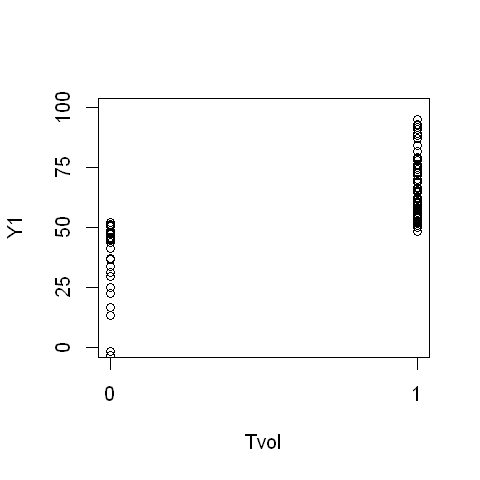

In [2]:
options(repr.plot.width=4, repr.plot.height=4)
plot( Tvol, Y1, xlim = c( 0, 1), ylim = c( 0, 100), xaxp = c(0, 1, 1), yaxp = c(0, 100, 4))

## 1度目の小テストの結果に対する回帰分析

In [3]:
lm(Y1 ~ Tvol)


Call:
lm(formula = Y1 ~ Tvol)

Coefficients:
(Intercept)         Tvol  
      37.28        31.50  


変数Tvolの係数(y=ax+bのa)が31.5と正の値になっています。Tvolの値は0か1なので、係数(y=ax+bのa)は、Tvol=1の場合の算術平均とTvol=0の場合の算術平均の差に等しくなります(y=ax+bのaは、xが1増えたとき、yがa増えるということを意味しています）。

In [4]:
sum(Tvol*Y1)/sum(Tvol) - sum((1-Tvol)*Y1)/sum(1-Tvol)

[1] 31.49733

## くじ引きでランダムに指定され、作業手伝いをしたか否かで分類した、2度目の小テストの成績分布

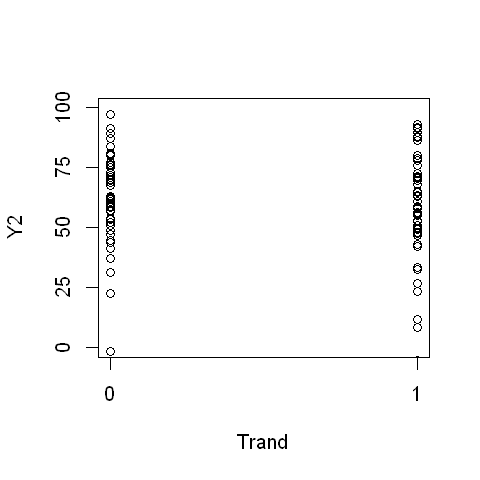

In [5]:
options(repr.plot.width=4, repr.plot.height=4)
plot( Trand, Y2, xlim = c( 0, 1), ylim = c( 0, 100), xaxp = c(0, 1, 1), yaxp = c(0, 100, 4))

## 2度目の小テスト(ランダム化実験)の結果に対する回帰分析

In [6]:
lm(Y2 ~ Trand)
sum(Trand*Y2)/sum(Trand) - sum((1-Trand)*Y2)/sum(1-Trand)


Call:
lm(formula = Y2 ~ Trand)

Coefficients:
(Intercept)        Trand  
     63.648       -5.202  


[1] -5.202306

以上、1度目の小テストの結果では、作業手伝いを行ったグループの方が小テストの成績が良いという関係が見られましたが、
作業手伝いをするか否かをランダムに指定した2度目の小テスト(ランダム化実験)では、作業手伝いを行うと試験の成績が下がるという結果が得られました。

本稿をご覧の皆様も、選択バイアスの存在には十分注意してください。  
ランダム化実験の実施が困難な場合、擬似的にランダム化実験を行った場合のように解析できるようにする「準実験法」という方法があります。
それらの方法に関して詳しく知りたい方は、以下の参考文献の9章～11章をご覧ください。


## 参考文献
#### 星野匡郎、田中久稔　Rによる実証分析　オーム社　平成28年　8章